In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statistics
from sklearn.linear_model import ElasticNet

import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [2]:
df=pd.read_csv('/content/sample_data/Walmart_Store_sales.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
...,...,...,...,...,...,...,...,...
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [3]:
df.describe(include="all")

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [4]:
df.shape

(150, 8)

### Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

In [6]:
df = df.dropna(subset=['Date'])
#missing value. will have to use simpleImputer for categorical and numerical

In [7]:
df["Date"].head()

0    18-02-2011
1    25-03-2011
2    27-07-2012
4    28-05-2010
5    28-05-2010
Name: Date, dtype: object

In [8]:
df = df[df['Weekly_Sales'].isna() == False]
type_columns_1=df.dtypes

print("we need to change the Date's type 'object' into a 'date'. Then add columns day,months year")

display(type_columns_1)
df['Date'] = pd.to_datetime(df['Date'])
type_columns_2=df.dtypes

print("The 'Date' type has been changed to datetime64[ns]")
display(type_columns_2)



we need to change the Date's type 'object' into a 'date'. Then add columns day,months year


Store           float64
Date             object
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

The 'Date' type has been changed to datetime64[ns]


<ipython-input-8-d97127b1844d>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


Store                  float64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag           float64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features :
- *year*
- *month*
- *day*
- *day of week*


In [9]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658


In [10]:
df.dtypes

Store                  float64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag           float64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [11]:
df['Store'] =  df['Store'].astype(str)
df['Store'] = [ f'store {x}' for x in df['Store'] ]

df['Holiday_Flag'] =  df['Holiday_Flag'].astype(str)
df['Holiday_Flag'] = [ 'Yes' if x == '1.0' else 'No' for x in df['Holiday_Flag'] ]

In [12]:
df['months']=df['Date'].dt.month
df['year']=df['Date'].dt.year
df["day"]=df['Date'].dt.day
# df["day_of_week"]=df['Date'].dt.day_name()
df["day_of_week"]=df.Date.dt.weekday



df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,months,year,day,day_of_week
0,store 6.0,2011-02-18,1572117.54,No,59.61,3.045,214.777523,6.858,2,2011,18,4
1,store 13.0,2011-03-25,1807545.43,No,42.38,3.435,128.616064,7.470,3,2011,25,4
4,store 6.0,2010-05-28,1644470.66,No,78.89,2.759,212.412888,7.092,5,2010,28,4
5,store 4.0,2010-05-28,1857533.70,No,NaN,2.756,126.160226,7.896,5,2010,28,4
6,store 15.0,2011-03-06,695396.19,No,69.80,4.069,134.855161,7.658,3,2011,6,6


In [14]:
Boxplot_represention = make_subplots(rows = 2, cols = 2,
                                                subplot_titles = ("Ditribution Temperature",
                                                                  "Ditribution Fuel_price", "Distribution CPI", "Distribution Unemployment")
                                               )

Boxplot_represention.add_trace(go.Box(
                                        x = df["Temperature"],
                                        name="Temperature Outlier"),
                                        row = 1, col = 1)

Boxplot_represention.add_trace(go.Box(
                                        x = df["Fuel_Price"],
                                        name="Fuel Price Outlier"),
                                        row = 1, col = 2)

Boxplot_represention.add_trace(go.Box(
                                        x = df["CPI"],
                                        name="CPI Outlier"),
                                        row = 2, col = 1)

Boxplot_represention.add_trace(go.Box(
                                        x = df["Unemployment"],
                                        name="Unemployment Outlier"),
                                        row = 2, col = 2)

Boxplot_represention.show()
print("We can see some outlier in the Unemployment distribution")

We can see some outlier in the Unemployment distribution


In [15]:
# Deal with outliers
def remove_outliers(column : str , df=df):

    mean_ = np.mean(df[column])
    std_dev = np.std(df[column])
    threshold = 3 * std_dev
    lower_bound = mean_ - threshold
    upper_bound = mean_ + threshold
    return df[(df[column] > lower_bound) & (df[column] < upper_bound)]

print('Before removing outliers : ' , len(df))
for col in ['Temperature' , 'Fuel_Price' , 'CPI' , 'Unemployment' , 'Weekly_Sales']:
    df = remove_outliers(column=col)


print('After removing outliers : ' , len(df)) # No value were removed

Before removing outliers :  118
After removing outliers :  118


In [16]:
df.isnull().sum()/df.shape[0]

Store           0.000000
Date            0.000000
Weekly_Sales    0.000000
Holiday_Flag    0.000000
Temperature     0.093220
Fuel_Price      0.093220
CPI             0.076271
Unemployment    0.093220
months          0.000000
year            0.000000
day             0.000000
day_of_week     0.000000
dtype: float64

In [22]:
colums_to_remove=["Date"]
df_for_sales=df.drop(colums_to_remove, axis=1)
sales_year=df_for_sales.groupby(['year']).mean()
sales_year

<ipython-input-22-18f2eb162c46>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,months,day,day_of_week
year,,,,,,,,
2010,1.262299e+06,61.720638,2.795311,178.129923,7.905000,7.274510,17.098039,3.784314
2011,1.307825e+06,65.306562,3.603686,176.846399,7.806000,7.162162,15.918919,4.216216
2012,1.186374e+06,53.766429,3.713963,178.130804,7.199103,5.666667,14.033333,3.200000


In [20]:
sales_month=df_for_sales.groupby(['months']).mean()
sales_day_of_month=df_for_sales.groupby(['day']).mean()
sales_day_of_week=df_for_sales.groupby(['day_of_week']).mean()
sales_per_store=df_for_sales.groupby(['Store']).mean()


<ipython-input-20-4159c6cecce1>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-20-4159c6cecce1>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-20-4159c6cecce1>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-20-4159c6cecce1>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to Fal

In [23]:
sales_trend=make_subplots(rows=1,cols=5, subplot_titles=("Sales from 2010 to 2012", "Sale per months",
                                                           "Sales Day of the months","Sales per Day of week"))



sales_trend.add_trace(go.Bar(x=sales_year.index,
                                   y=sales_year["Weekly_Sales"]),
                                   row=1,col=1)

sales_trend.add_trace(go.Bar(x=sales_month.index,
                                   y=sales_month["Weekly_Sales"]),
                                   row=1,col=2)

sales_trend.add_trace(go.Bar(x=df["day_of_week"],
                                   y=df["Weekly_Sales"]),
                                   row=1,col=4)

sales_trend.add_trace(go.Bar(x=sales_day_of_month.index,
                                   y=sales_day_of_month["Weekly_Sales"]),
                                   row=1,col=3)

sales_trend.add_trace(go.Bar(x=sales_per_store.index,
                                   y=sales_per_store["Weekly_Sales"]),
                                   row=1,col=5)
sales_trend.update_layout(bargap=0.2)

The "Sales from 2010 to 2012" graph shows that the sales slightly decrease.

The "Sales per months" graphs shows that the highest sales are on february 1,64M

The "Sales Day of the months" shows spike of sales on the 12th of each months.

The "Sales per Day of week" shows that most of the majority of the sales are done on Fridays.

The "Sales per store" shows us disparities in sales between each stores which we have to take in consideration on our analysis.


In [ ]:
fig = px.scatter_matrix(df_for_sales)
fig.update_layout(
        title = go.layout.Title(text = "Bivariate analysis", x = 0.5), showlegend = False,
            autosize=False, height = 1200, width = 1200)
fig.show()



In [ ]:
corr_matrix = df.corr().round(2)

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())
fig.show()

<ipython-input-23-2bd6f20afb53>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



**Analysis**

In this EDA, we want to understand the different factors that can influence our "Weekly_Sales". That's why we did a pairwise scatterplot correlation and correlation matrix. Please see above.

According to those matrix we can see that the CPI (-0.33) is the most correlated with the weekly sales. When CPI is increase, the weekly sales tends to decrease. Same goes with the temperature (-0.2).

Otherwise, the Fuel price and Year (0.81) are highly correlated.


**BASELINE FOR MULTIPLE LINEAR REGRESSION**

In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'months', 'year', 'day',
       'day_of_week'],
      dtype='object')

In [ ]:
# Separate target variable Y from features X

features_list_final= ["Store","Holiday_Flag","Temperature","Fuel_Price", "CPI","months","year","day",'day_of_week']
target_variable_final = "Weekly_Sales"

X_final = df.loc[:,features_list_final]
Y_final = df.loc[:,target_variable_final]


# First : always divide dataset into train set & test set !!
X_train_final, X_test_final, Y_train_final, Y_test_final = train_test_split(X_final, Y_final, test_size=0.2, random_state=0)


# Create pipeline for numeric features
# date_features_final=['months',"year","day",'day_of_week']
numeric_features_final=['Temperature',"Fuel_Price", "CPI",'months',"year","day",'day_of_week']
categorical_features_final = ['Store',"Holiday_Flag"]

numeric_transformer_final = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # missing values will be replaced by columns' median
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features

categorical_transformer_final = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first'))
    ])


preprocessor_final = ColumnTransformer(
    transformers=[
        ('numerical_transformer', numeric_transformer_final, numeric_features_final),
        ('categorical_transformer', categorical_transformer_final, categorical_features_final)

    ])


# Preprocessings on train set
X_train_transformed_final = preprocessor_final.fit_transform(X_train_final)


# Preprocessings on test set

X_test_transformed_final  = preprocessor_final.transform(X_test_final)


# Encode target variable Y
scaler = StandardScaler()
Y_train_final=Y_train_final.array.reshape(-1, 1)
Y_test_final=Y_test_final.array.reshape(-1, 1)
Y_train_transformed_final = scaler.fit_transform(Y_train_final)

Y_test_transformed_final= scaler.transform(Y_test_final)





In [ ]:
# Train model
regressor_final = LinearRegression()
regressor_final.fit(X_train_transformed_final, Y_train_transformed_final)


# Predictions on training set

Y_train_pred_final= regressor_final.predict(X_train_transformed_final)


# Predictions on test set

Y_test_pred_final = regressor_final.predict(X_test_transformed_final)


# Print R^2 scores
r2_score_train_final= r2_score(Y_train_transformed_final, Y_train_pred_final)
r2_score_test_final=r2_score(Y_test_transformed_final, Y_test_pred_final)
mae_test = mean_absolute_error(Y_test_transformed_final, Y_test_pred_final)
mse_test = mean_squared_error(Y_test_transformed_final, Y_test_pred_final)
rmse_test = np.sqrt(mse_test)

print("R2 score on training set : ", r2_score_train_final)
print("R2 score on test set : ", r2_score_test_final)
print("Mean absolute error :",mae_test )
print("Mean square error :",mse_test )
print("Root mean absolute error :",rmse_test )

R2 score on training set :  0.9716391168830882
R2 score on test set :  0.8870694501432794
Mean absolute error : 0.22918077085718958
Mean square error : 0.07583306685631784
Root mean absolute error : 0.27537804352620027


In [ ]:
regressor_final.coef_

array([[-0.08538909, -0.05165828,  0.05766021,  0.08284963, -0.00257471,
        -0.05023312,  0.00440979,  0.69121653,  0.46532971, -0.59715553,
         0.80561378,  0.9040998 , -1.12340795, -1.48486328, -1.06735675,
        -0.49045748, -0.06381803,  0.65931628,  0.64768733, -1.69378002,
         1.0064152 , -1.81902976,  0.09743433, -1.46623203, -1.12151553,
        -1.589555  , -0.26068824]])

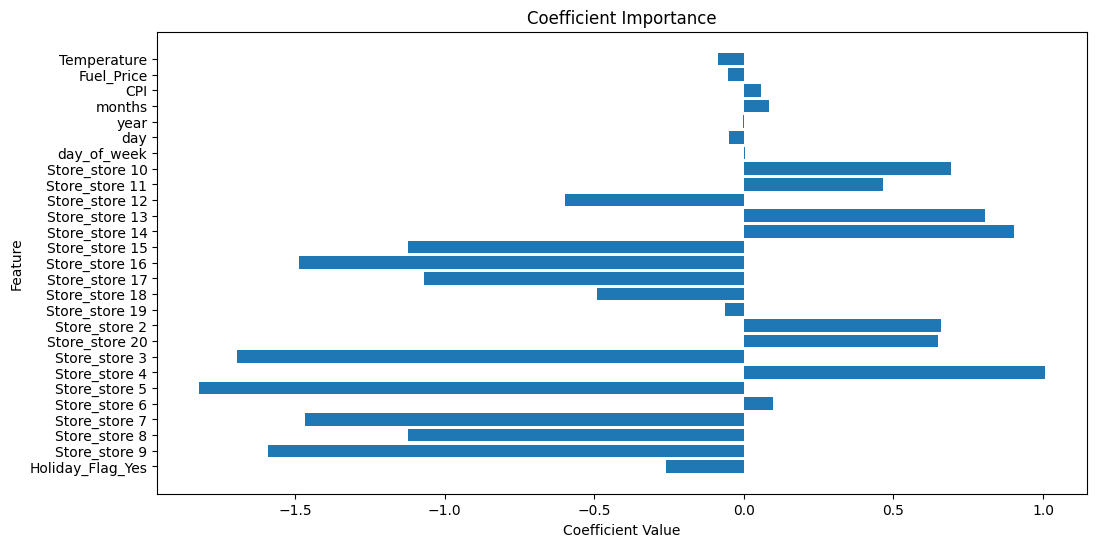

In [ ]:
import matplotlib.pyplot as plt


coefficients = regressor_final.coef_[0]

# After you've fitted the preprocessor_final on your training data, you can get the transformed feature names as follows:
transformed_feature_names = preprocessor_final.named_transformers_['categorical_transformer'].named_steps['encoder'].get_feature_names_out(input_features=categorical_features_final)

# Combine all feature names
all_feature_names = np.concatenate([numeric_features_final, transformed_feature_names])
# all_feature_names = np.concatenate([numeric_features_final, transformed_feature_names, date_features_final])

coefficients_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})

# Create a bar plot to visualize coefficients
plt.figure(figsize=(12, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficient Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important features at the top
plt.show()




The coeffcient are negative for "Store_2.0","Store_5.0", "Store_7.0", "Store_8.0", "Store_9.0", "Store_12.0", "Store_16.0","Store_18.0","Store_19.0" which are  are associated with lower sales performance compared to others. It's essential to have further investigation to understand why those store are negatively correlated with sales.

For positive coefficient on the rest of the store show that they are positively correlated to the sales and are associated with higher sales performance

For other negative coefficient related to "Fuel_Price" and "holiday_flag" means that if the "Fuel_Price" increase the customer tends to purchase less. Same goes for the Holiday_Flag_1.0, if there is holidays, seems like the customer purchased less meaning somight go on holidays.



### PART 3: FIGHT OVERFITTING

In this part, we will try to fight the overfitting using a regularized linear regression model such as  Ridge and Lasso

In [ ]:
print("10-fold cross-validation...")
scores = cross_val_score(regressor_final,X_train_transformed_final, Y_train_transformed_final, cv=10)
mean_cv_score = scores.mean()
std_cv_score = scores.std()
print('Cross-validated accuracy : {}\nstandard deviation : {}'.format(mean_cv_score, std_cv_score))

results = [{
    'Model': "Linear Regression",
    'R2 Train Score': r2_score_train_final,
    'R2 Test Score': r2_score_test_final,
    'MAE Test': mae_test,
    'MSE Test': mse_test,
    'RMSE Test': rmse_test,
    'CV R2 Score': mean_cv_score,
    'Standard Deviation': std_cv_score,
}]

10-fold cross-validation...
Cross-validated accuracy : 0.9276940097706985
standard deviation : 0.03358280320703789


In [ ]:
models = {

    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.005, 0.02, 0.03, 0.05, 0.06],
            # 'alpha': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1.0, 10, 100],
            'solver': ['auto', 'lsqr', 'sparse_cg', 'sag'],
            'max_iter': [100, 200, 500, 1000, 10000, 100000],
            'tol': [1e-3, 1e-4, 1e-5]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            # 'alpha': [ 0.01, 0.1, 1.0, 10, 100],
            'alpha': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1.0, 10, 100],
            'selection': ['cyclic', 'random'],
            'max_iter': [100, 200, 500, 1000, 10000, 100000],
            'tol': [1e-3, 1e-4, 1e-5]
        }
    }
}

In [ ]:
coefficients_list = []

for name, model_info in models.items():
    model = model_info['model']
    params = model_info['params']

    #Best combination of the hyperameters for model
    grid_search = GridSearchCV(model, params, cv=10, scoring='r2')
    grid_search.fit(X_train_transformed_final, Y_train_transformed_final)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    coeff=best_model.coef_
    if coeff.ndim == 1:
            coeff = coeff.reshape(1, -1)

    # Store the coefficients and model name
    transformed_feature_names = preprocessor_final.named_transformers_['categorical_transformer'].named_steps['encoder'].get_feature_names_out(input_features=categorical_features_final)
    # all_feature_names = np.concatenate([numeric_features_final, transformed_feature_names, date_features_final])
    all_feature_names = np.concatenate([numeric_features_final, transformed_feature_names])
    coefficients_list.append((name, coeff,all_feature_names))


    #Assessing the performance of the best_model
    cv_scores = cross_val_score(best_model, X_train_transformed_final, Y_train_transformed_final, cv=10, scoring='r2')
    mean_cv_score = cv_scores.mean()
    std_cv_score = cv_scores.std()

    # Predictions
    Y_train_pred = best_model.predict(X_train_transformed_final)
    Y_test_pred = best_model.predict(X_test_transformed_final)

    # Metrics
    r2_train = r2_score(Y_train_transformed_final, Y_train_pred_final)
    r2_test = r2_score(Y_test_transformed_final, Y_test_pred)
    mae_test = mean_absolute_error(Y_test_transformed_final, Y_test_pred)
    mse_test = mean_squared_error(Y_test_transformed_final, Y_test_pred)
    rmse_test = np.sqrt(mse_test)

    results.append({
        'Model': name,
        'Alpha': best_params['alpha'],
        'R2 Train Score': r2_train,
        'R2 Test Score': r2_test,
        'MAE Test': mae_test,
        'MSE Test': mse_test,
        'RMSE Test': rmse_test,
        'CV R2 Score': mean_cv_score,
        'Standard Deviation': std_cv_score,
    })

In [ ]:
results_df = pd.DataFrame(results)
results_df

,Model,R2 Train Score,R2 Test Score,MAE Test,MSE Test,RMSE Test,CV R2 Score,Standard Deviation,Alpha
0,Linear Regression,0.971639,0.887069,0.229181,0.075833,0.275378,0.927694,0.033583,NaN
1,Ridge,0.971639,0.887790,0.223805,0.075349,0.274498,0.930565,0.033441,0.050
2,Lasso,0.971639,0.894536,0.217771,0.070819,0.266118,0.931555,0.035813,0.001


In [ ]:
coefficients_list

[('Ridge',
  array([[-0.0852757 , -0.04568704,  0.06296038,  0.08191436, -0.00857631,
          -0.04869994,  0.00694745,  0.75732601,  0.47022844, -0.52466868,
           0.87638599,  0.96248167, -1.0338131 , -1.3900886 , -0.9775244 ,
          -0.40657712,  0.0105647 ,  0.72331123,  0.70284097, -1.61456269,
           1.07776361, -1.73025476,  0.16104616, -1.39085131, -1.04141675,
          -1.49960474, -0.22888608]]),
  array(['Temperature', 'Fuel_Price', 'CPI', 'months', 'year', 'day',
         'day_of_week', 'Store_store 10', 'Store_store 11',
         'Store_store 12', 'Store_store 13', 'Store_store 14',
         'Store_store 15', 'Store_store 16', 'Store_store 17',
         'Store_store 18', 'Store_store 19', 'Store_store 2',
         'Store_store 20', 'Store_store 3', 'Store_store 4',
         'Store_store 5', 'Store_store 6', 'Store_store 7', 'Store_store 8',
         'Store_store 9', 'Holiday_Flag_Yes'], dtype=object)),
 ('Lasso',
  array([[-0.08337024, -0.04414259,  0.065370

Model Name: Ridge
Coefficients Shape: (1, 27)
Features Length: 27


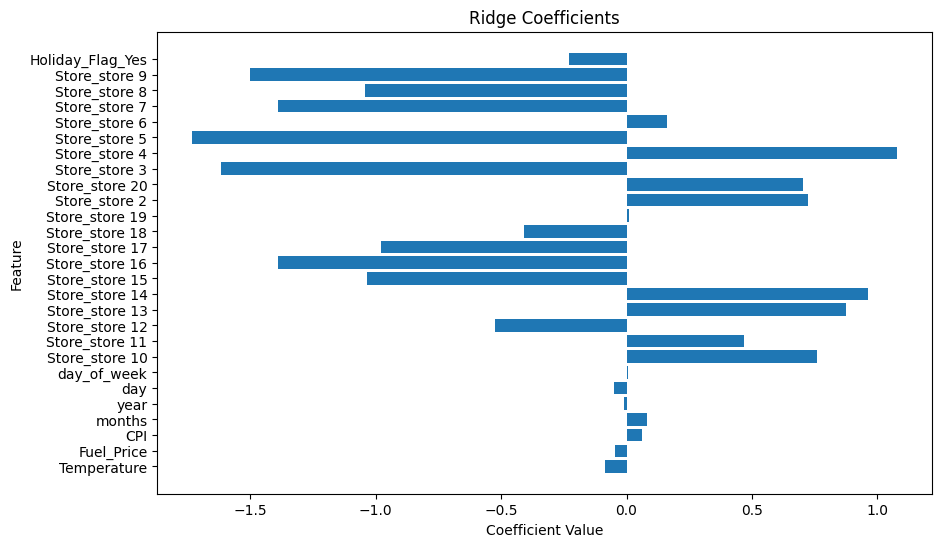

Model Name: Lasso
Coefficients Shape: (1, 27)
Features Length: 27


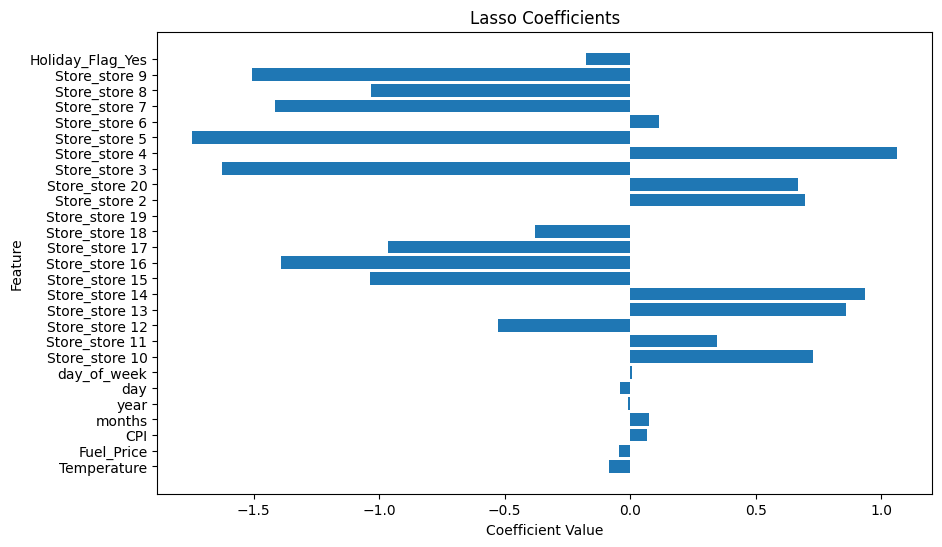

In [ ]:
for name, coefficients, features in coefficients_list:
    print(f"Model Name: {name}")
    print("Coefficients Shape:", coefficients.shape)
    print("Features Length:", len(features))  # Get the number of features

    # Convert features to a list if it's not already
    if not isinstance(features, list):
        features = list(features)

    plt.figure(figsize=(10, 6))
    plt.barh(features, coefficients[0])  # Use coefficients[0] to access the 1D array of coefficients
    plt.title(f'{name} Coefficients')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()


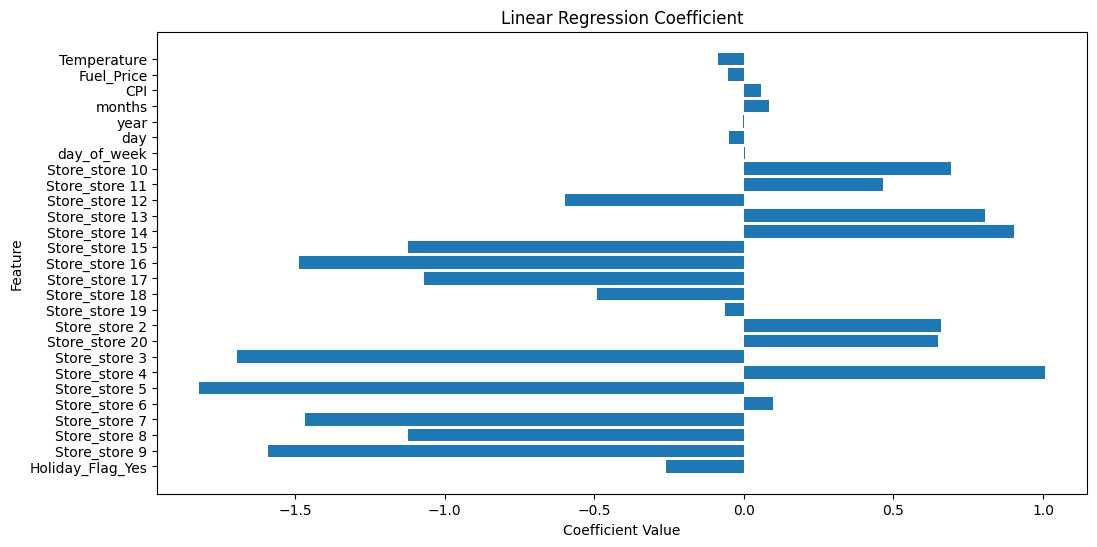

In [ ]:

coefficients = regressor_final.coef_[0]

# After you've fitted the preprocessor_final on your training data, you can get the transformed feature names as follows:
transformed_feature_names = preprocessor_final.named_transformers_['categorical_transformer'].named_steps['encoder'].get_feature_names_out(input_features=categorical_features_final)

# Combine all feature names
all_feature_names = np.concatenate([numeric_features_final, transformed_feature_names])

coefficients_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})

# Create a bar plot to visualize coefficients
plt.figure(figsize=(12, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Linear Regression Coefficient')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important features at the top
plt.show()

### Conclusion : Which model is the best?

Based on the provided results, here are some comments and observations:

**R2 Test Scores**:

When looking at R2 Test Scores, you can see that Ridge and Lasso outperform Linear Regression:
- Lasso R2 Test Score = 0.8945
- Ridge R2 Test Score = 0.8877
- Linear Regression R2 Test Score = 0.8870.

This suggests that both Ridge and Lasso have better generalization performance on unseen data compared to Linear Regression.

**Evaluation Metrics (MAE,MSE,RMSE)**:

Lasso has the lower MAE, MSE, and RMSE indicate better predictive performance. and smaller prediction errors on the test data.

Lasso: MAE= 0.2178, MSE = 0.07081, RMSE=0.2661

**Cross-Validated R2 Scores**:

The Lasso cross-validated R2 Scores (0.9315) is the highest than the R2 Test Scores for all three models which means 93% of the variance in the target variable is predictable

 In this case, we will choose the Lasso model.


In [ ]:
results_df = pd.DataFrame(results)
results_df

,Model,R2 Train Score,R2 Test Score,MAE Test,MSE Test,RMSE Test,CV R2 Score,Standard Deviation,Alpha
0,Linear Regression,0.971639,0.887069,0.229181,0.075833,0.275378,0.927694,0.033583,NaN
1,Ridge,0.971639,0.887790,0.223805,0.075349,0.274498,0.930565,0.033441,0.050
2,Lasso,0.971639,0.894536,0.217771,0.070819,0.266118,0.931555,0.035813,0.001


Opening: In other to understand further the sales per store, it'll be interesting to perform an analysis on each store to understand which features impact the sales. Some information are not provided, such as the location of store, the population of the cities that could help us to improve the model and provide better insights for each store.
